## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [439]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [440]:
# Random state seed
rseed = 42

## Load and explore data

In [441]:
# Import the dataset
# Load data
df = pd.read_csv('Country-data.csv')

In [442]:
# Check the shape
print(f"\nSize of rows/columns: {df.shape}\n")


Size of rows/columns: (167, 10)



In [443]:
# Check datatypes & counts
print(df.info(),"\n")
df.groupby('country').count().max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None 



child_mort    1
exports       1
health        1
imports       1
income        1
inflation     1
life_expec    1
total_fer     1
gdpp          1
dtype: int64

In [444]:
# Get descriptive statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [445]:
# Identify any missing data
print(f"\nChecking for if there are null values: \n{df.isnull().sum()}")


Checking for if there are null values: 
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


## Preprocessing and Feature Selection

In [446]:
# Drop any non-numeric features (columns)
print(f"\nChecking the first 5 Rows and all columns of data: \n{df.head()}\n")

# Dropping country column
X=df.drop('country', axis=1)
y= df['country']
X.head()


Checking the first 5 Rows and all columns of data: 
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


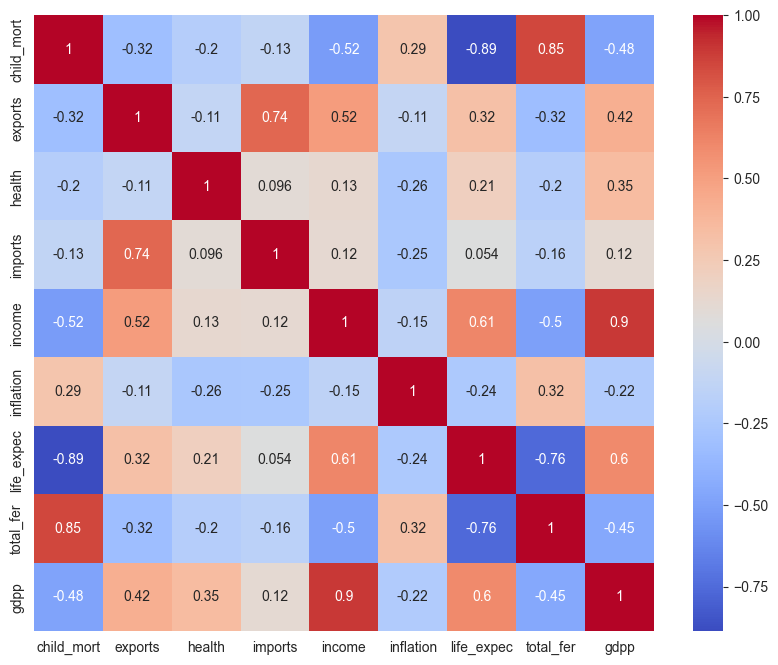

In [447]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
# Calculate the correlation matrix
correlation_matrix = X.corr()
# Create the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.show()


#### Looking at the corelation matrix above we can see that:
##### -Child Mortality has highest relation with Life expentancy and total fertility
##### -Export has the highest relaation with imports and then income
##### -Health has very low relation with any of the other feature
##### -Inflationi has a very low relation with any of the other features asa well
##### -GDPP has a very high relation with income. this has the highest relation value that any other features

In [448]:
X.columns[1:-1]

Index(['exports', 'health', 'imports', 'income', 'inflation', 'life_expec',
       'total_fer'],
      dtype='object')

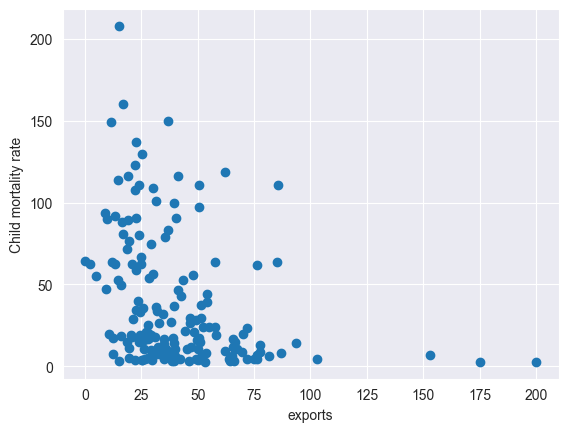

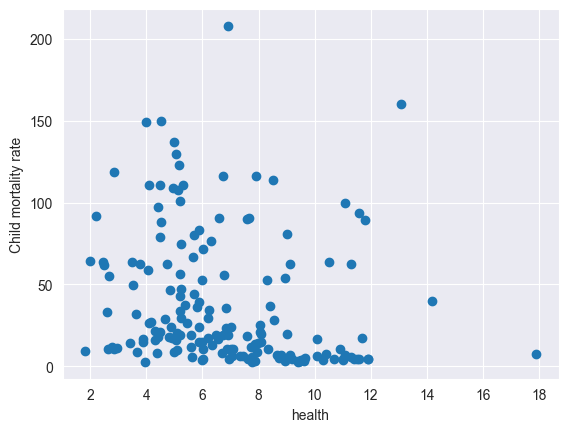

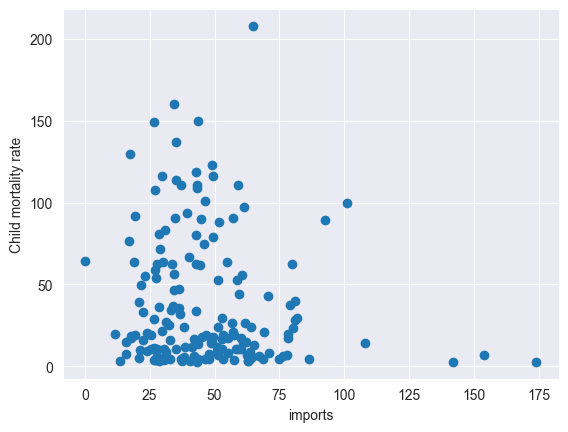

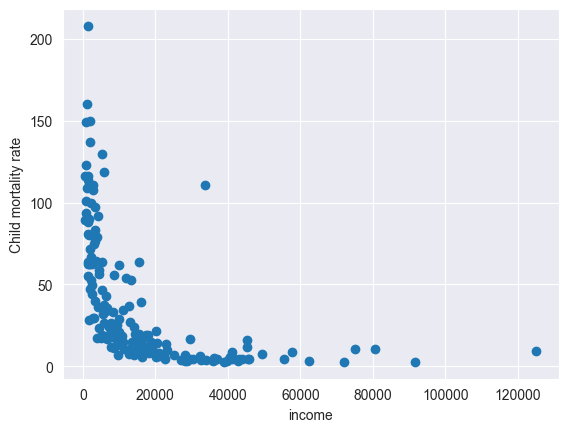

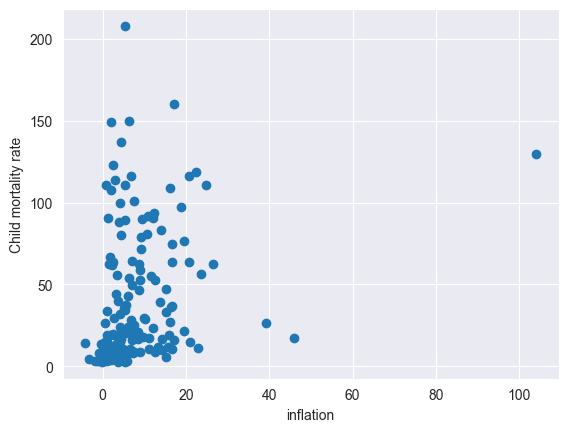

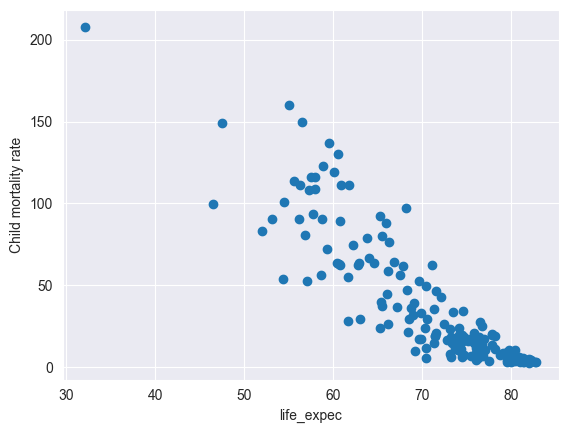

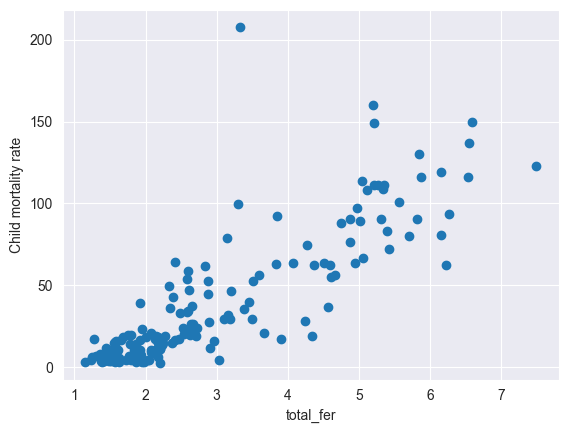

In [449]:
# Explore the continuous independent features against child_mort using scatter plots.
for f in X.columns[1:-1]:
  plt.scatter(X[f], X['child_mort'])
  plt.xlabel(f)
  plt.ylabel('Child mortality rate')
  plt.show()

##### Since Total_fer has the best correlation with total Child mortality we will used this for K clustering


In [450]:
# Prepare data for clustering, note that we do not supply y in an unsupervised learning task.
X_shaped = X[['total_fer','child_mort']].values.reshape(-1,2)  
print(X_shaped.shape)

(167, 2)


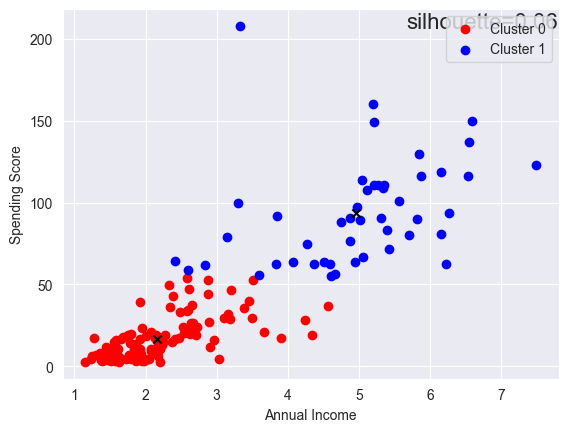

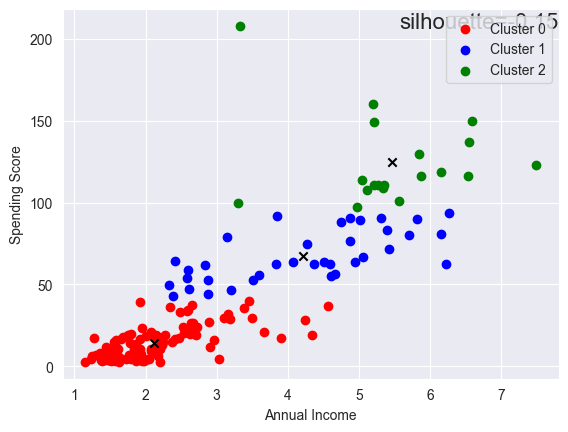

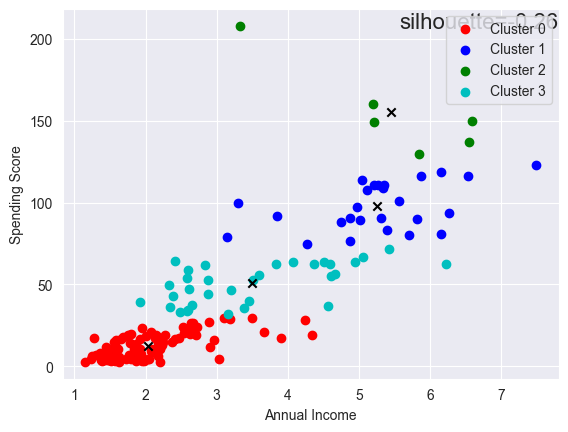

In [451]:
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

for k in range(2,5):
  scatter_Kmeans(X_shaped, k, r=0)
  

##### Looks like the best we have achieved is at K=2


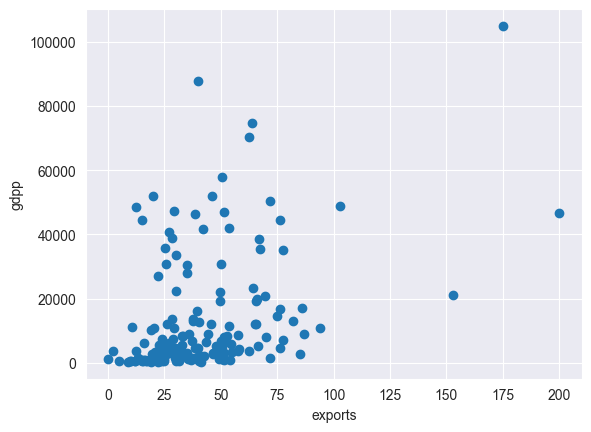

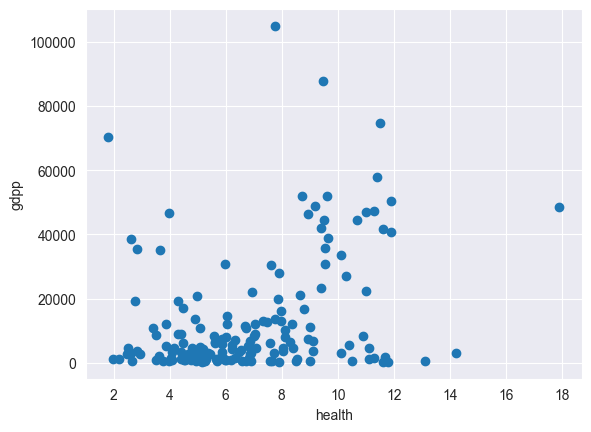

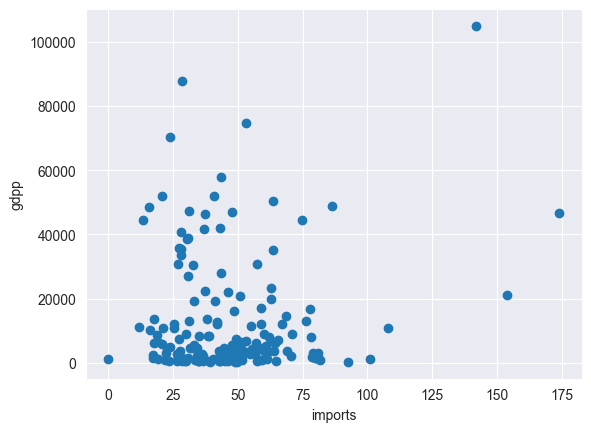

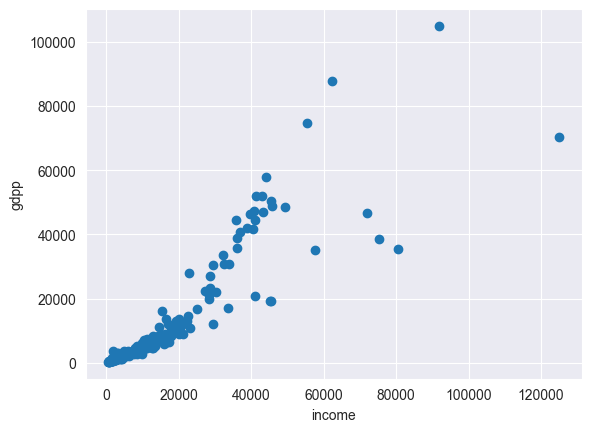

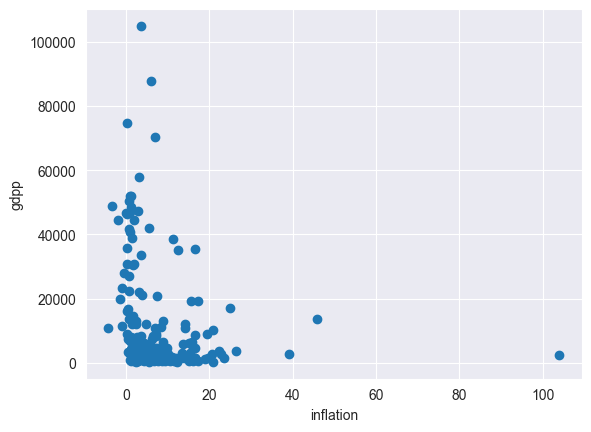

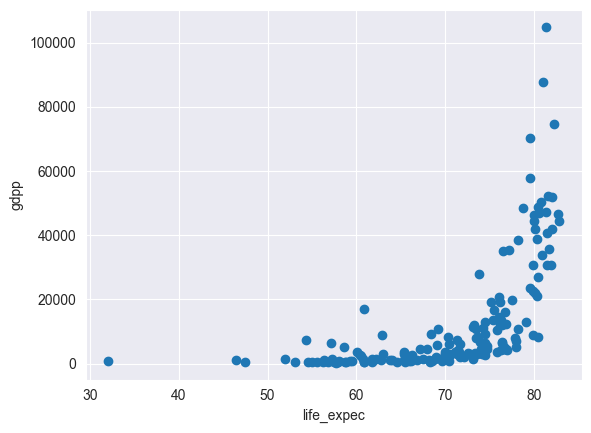

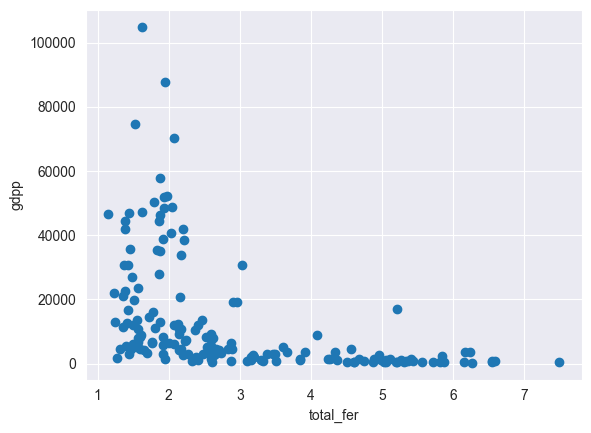

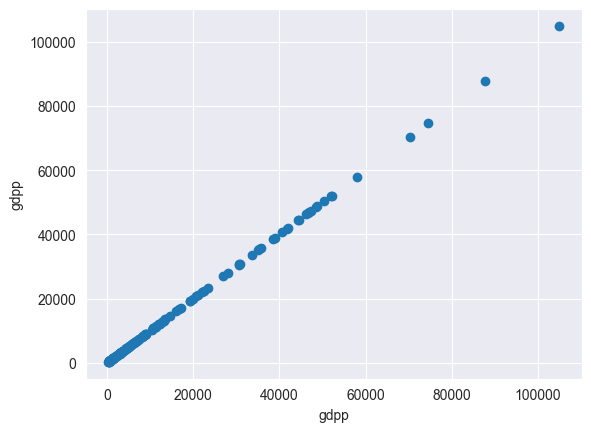

In [452]:
# Explore the continuous independent features against gdpp using scatter plots.
for f in X.columns[1:9]:
  plt.scatter(X[f], X['gdpp'])
  plt.xlabel(f)
  plt.ylabel('gdpp')
  plt.show()

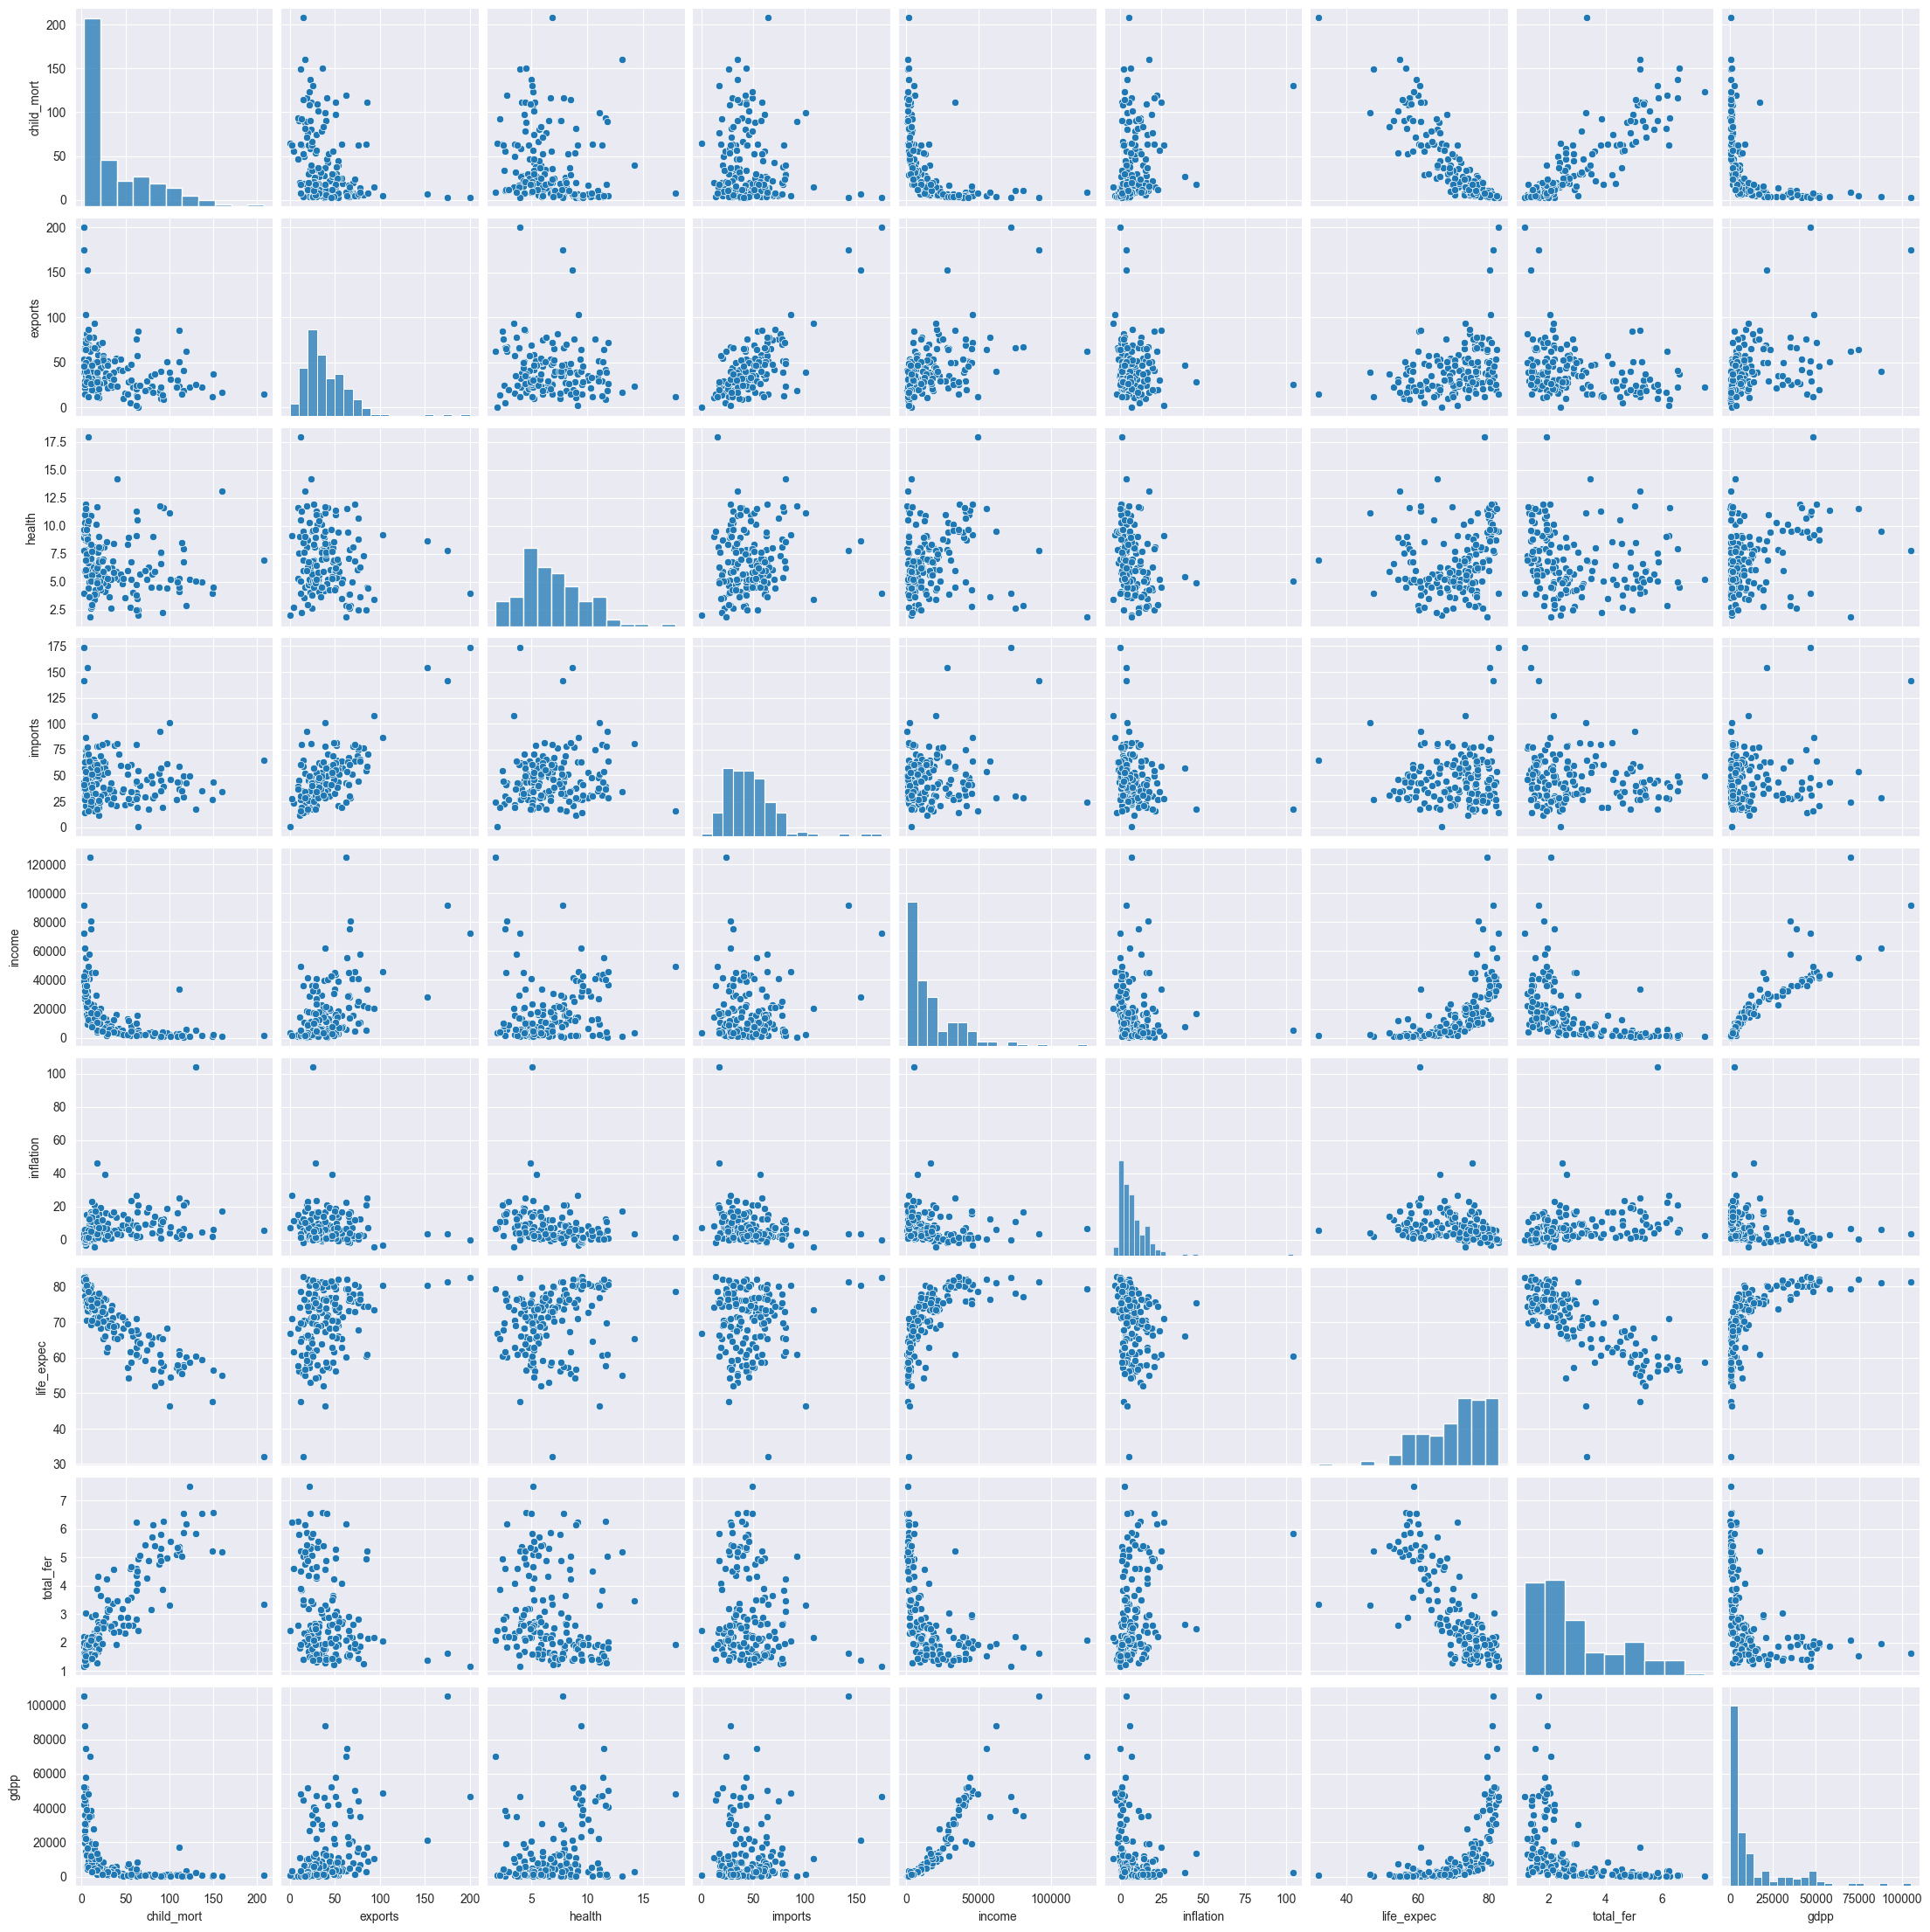

In [453]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.pairplot(X)

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

#### Ideal scaling candidate is Min max since there is no bell shape in any of the plots above

### Scaling the Data

In [454]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
fs = MinMaxScaler()
fs.fit(X)

df_scaled = fs.transform(X)
df_scaled= pd.DataFrame(df_scaled, columns = X.columns)

df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

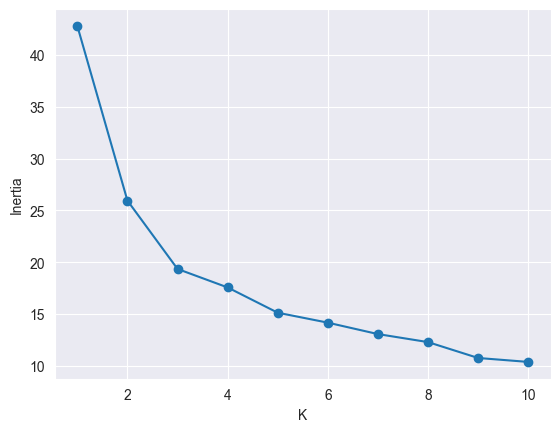

In [455]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(df_scaled)

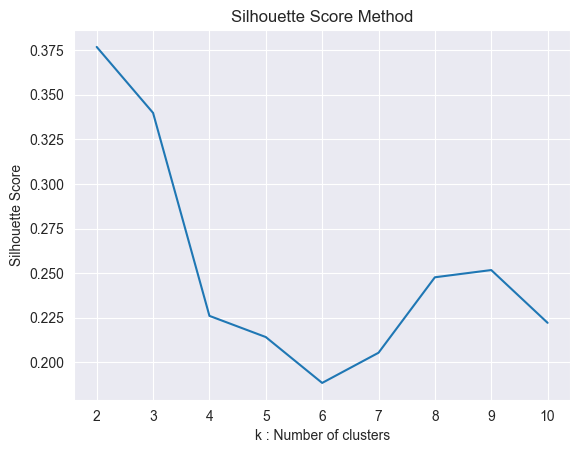

In [456]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.
-Based on the above the value of K is 3

## Fitting a K-Means Model with the selected K value

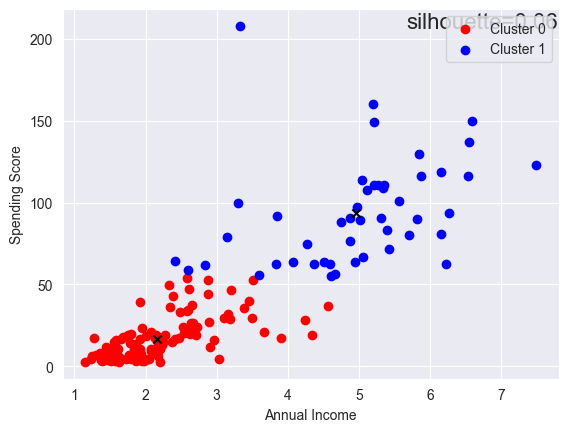

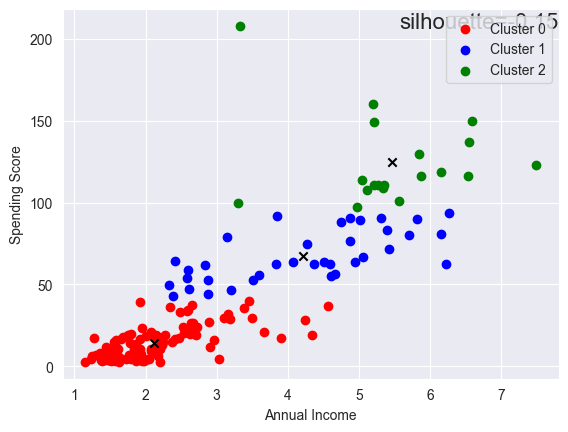

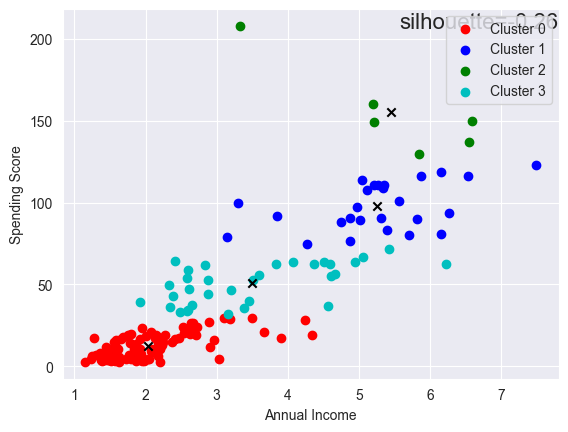

In [457]:
# Remember to set the random_state to rseed
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

for k in range(2,5):
  scatter_Kmeans(X_shaped, k, r=0)
  

In [458]:
# Count the number of records in each cluster
# Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
cluster_df = pd.DataFrame(df_scaled, columns=df_scaled.columns)
cluster_df['Cluster'] = kmeans.labels_
cluster_df['Cluster'].value_counts()

Cluster
0    87
2    45
1    35
Name: count, dtype: int64

In [459]:
# Check model performance with the silhouette coefficient
silhouette_score(cluster_df, kmeans.fit_predict(cluster_df))

0.6677606840446589

## Predictions

In [460]:
# Add the predicted cluster label column to the original dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df_scaled.columns)
df_scaled['Cluster'] = kmeans.labels_

## Visualisation of clusters

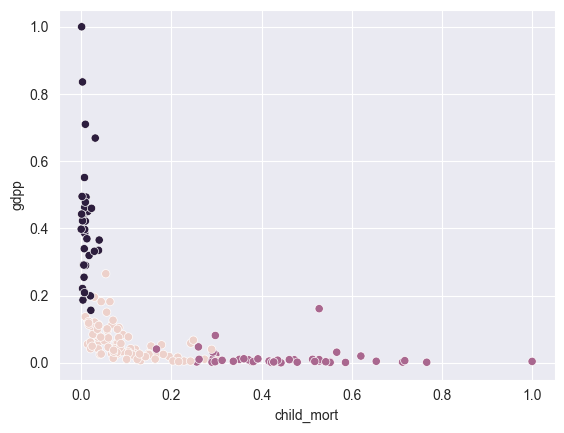

In [461]:
# Visualisation of clusters: child mortality vs gdpp

sns.scatterplot(x=df_scaled.columns[0], y=df_scaled.columns[8], data=df_scaled, hue='Cluster', legend=False)
plt.show()


#### There seems to be very little relation between gdpp and child_mort as the gdpp dropps almost immediately at mortality rate 0 and random as the rate increases

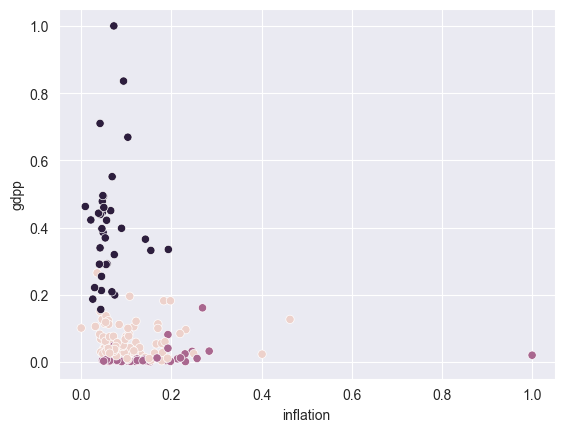

In [462]:
# Visualisation of clusters: inflation vs gdpp

sns.scatterplot(x=df_scaled.columns[5], y=df_scaled.columns[8], data=df_scaled, hue='Cluster', legend=False)
plt.show()

##### Looking at the graph above, as the inflation increases the gdpp seems to be decreasing and comes to almost 0 once the inflation increases above 0.2

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

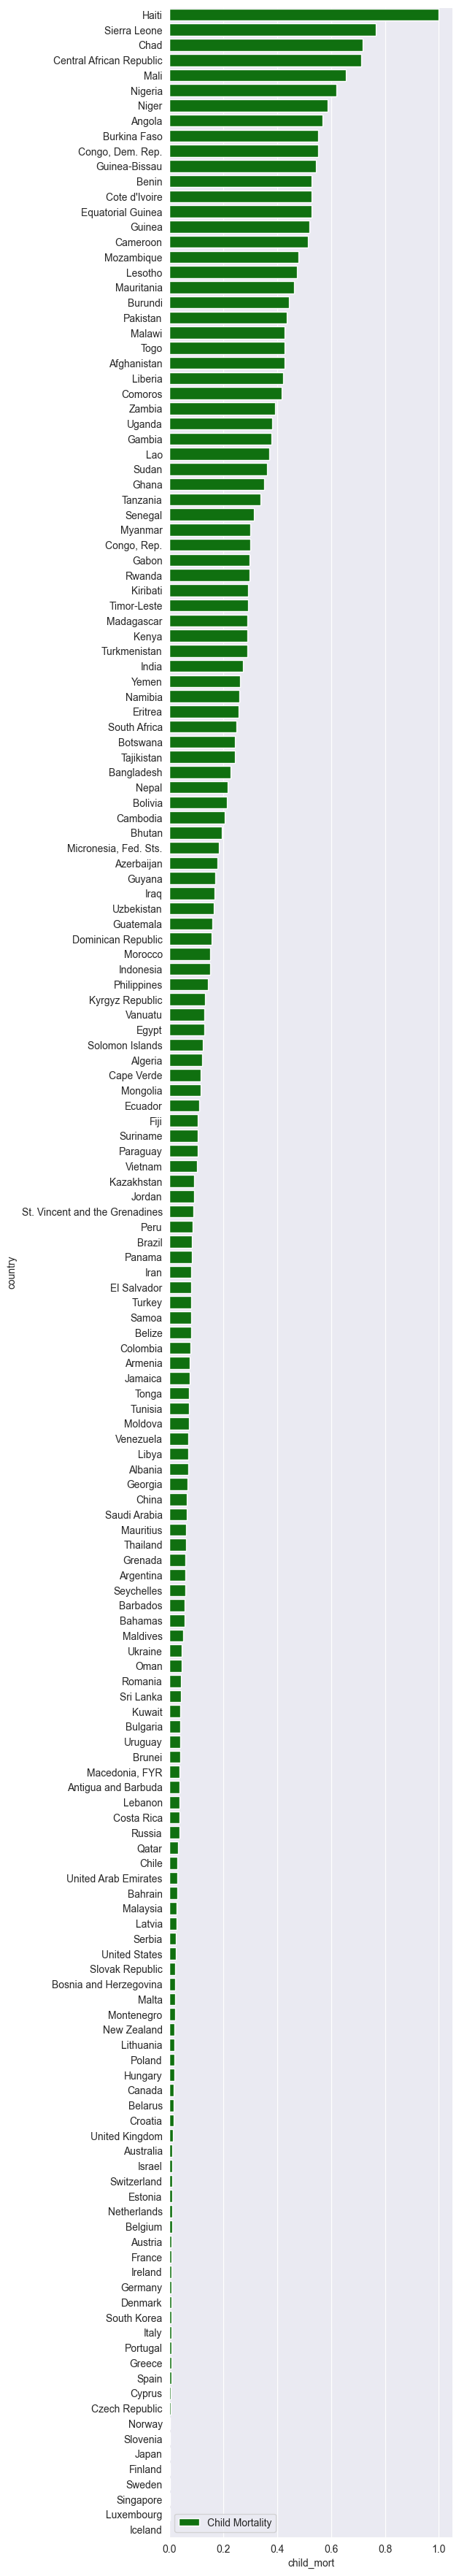

In [463]:
# Creating a standalone dataset thats sorted in decending order based on child_mortality
child_df = pd.DataFrame(df_scaled['child_mort'], columns=df_scaled.columns[0:1])
child_df['country'] = y
child_df = child_df.sort_values('child_mort',ascending=False)
child_df.columns[1:]

# Plotting the data to view the data in a plot
plt.figure(figsize=(5,45))
sns.set_style("darkgrid")
sns.barplot(df_scaled,x=child_df.child_mort,y=child_df.country, label="Child Mortality", color ="g")
plt.show()

#### Looking at the above chart, we can see that the Child mortality rate is very low for Iceland, countries that are advanced in technology and small countries that have very little population.
#### There is high mortality rate for countries that are not advance in medical technology and prone to higher death rate. The highest is for Haiti

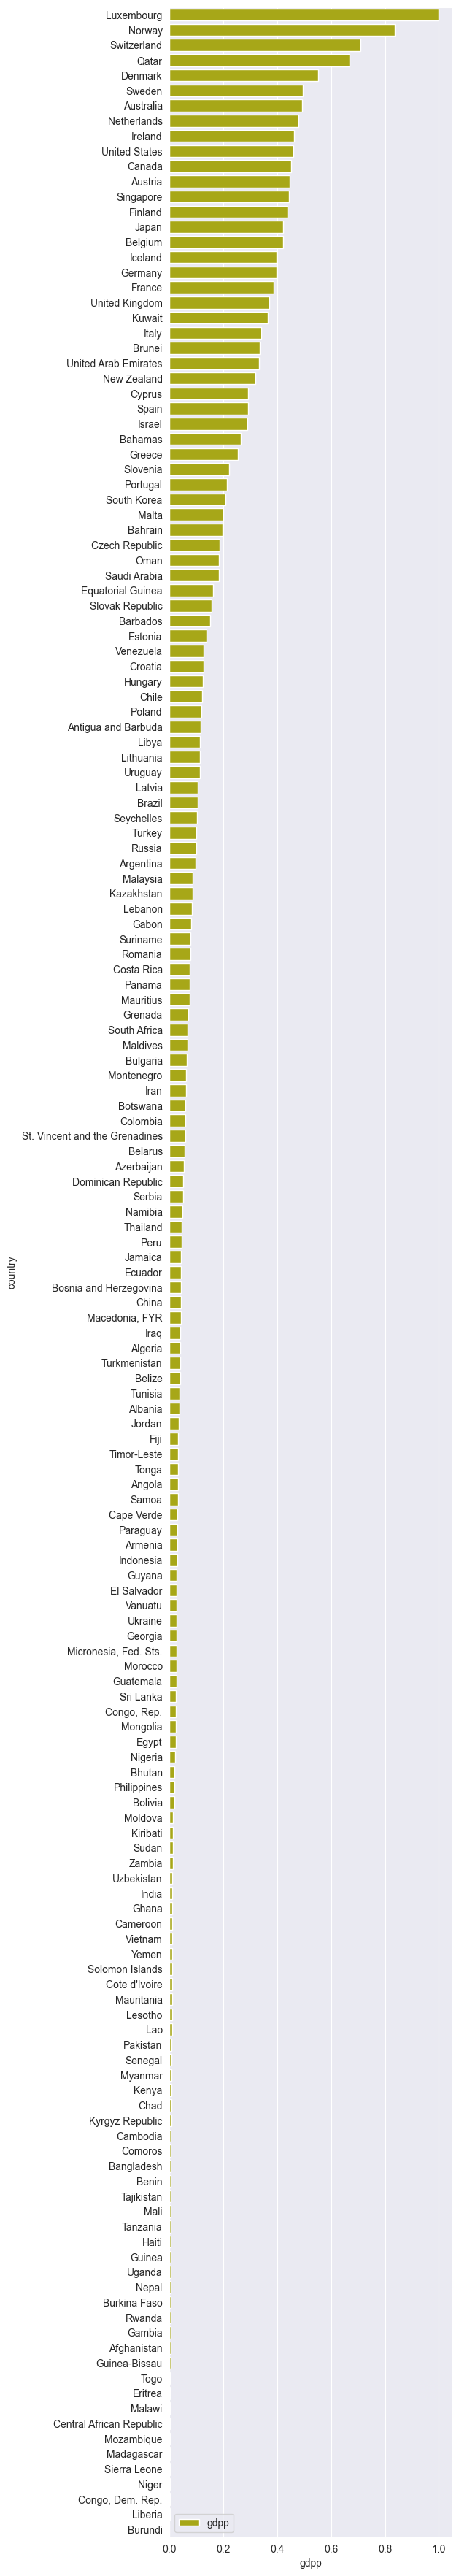

In [473]:
# Creating a standalone dataset thats sorted in decending order based on gdpp
gdpp_df = pd.DataFrame(df_scaled['gdpp'], columns=df_scaled.columns[8:9])
gdpp_df['country'] = y
gdpp_df = gdpp_df.sort_values('gdpp',ascending=False)
gdpp_df.columns[1:]

# Plotting the data to view the data in a plot
plt.figure(figsize=(5,45))
sns.set_style("darkgrid")
sns.barplot(df_scaled,x=gdpp_df.gdpp,y=gdpp_df.country, label="gdpp", color ="y")
plt.show()

#### It looks like the Gdpp for Luxembourg is the highest, which means it has the highest echonomic growth, with the Lowest being Burundi

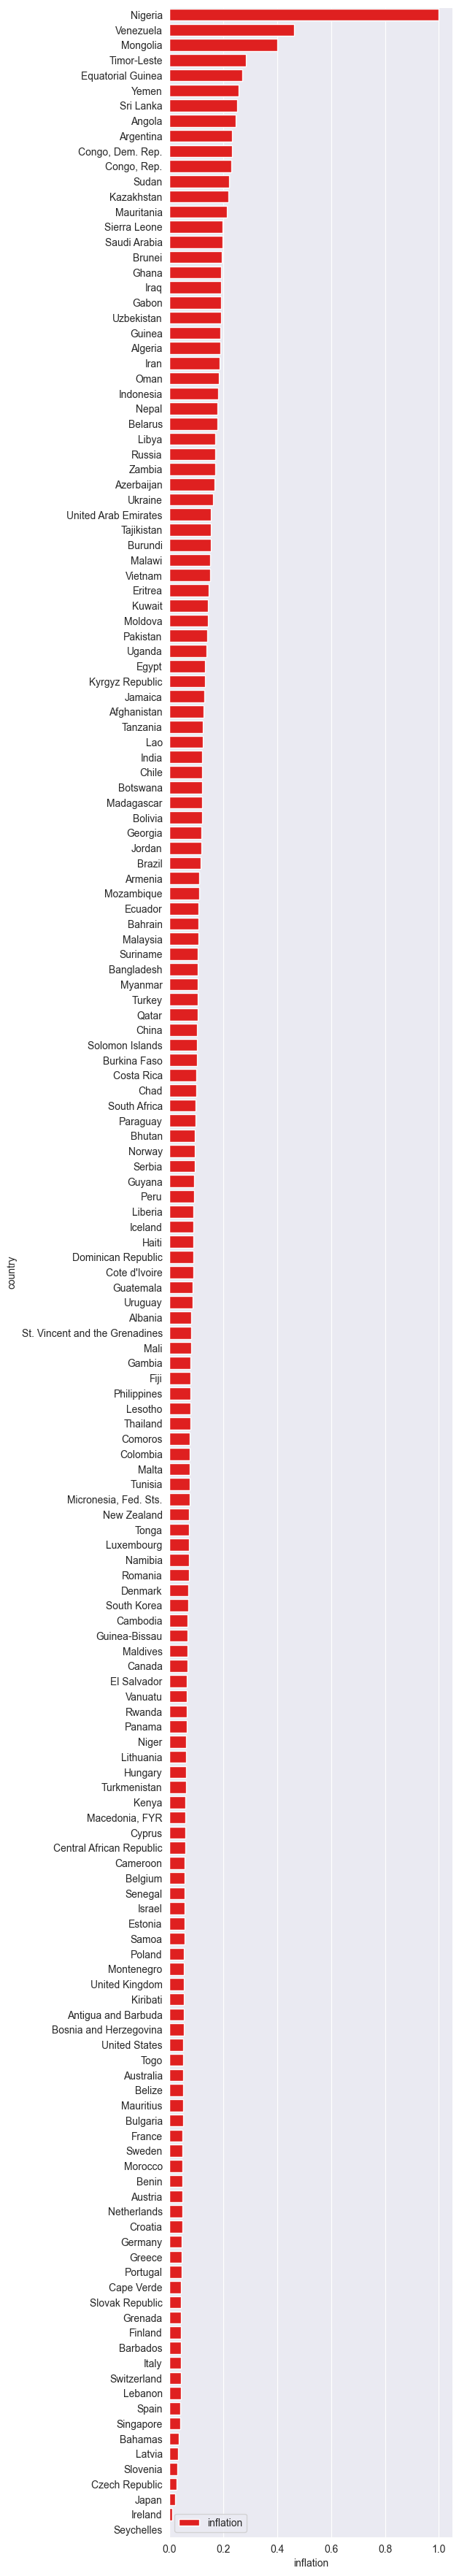

In [478]:
# Creating a standalone dataset thats sorted in decending order based on inflation
inflation_df = pd.DataFrame(df_scaled['inflation'], columns=df_scaled.columns[5:6])
inflation_df['country'] = y
inflation_df = inflation_df.sort_values('inflation',ascending=False)
inflation_df.columns[1:]

# Plotting the data to view the data in a plot
plt.figure(figsize=(5,45))
sns.set_style("darkgrid")
sns.barplot(df_scaled,x=inflation_df.inflation,y=inflation_df.country, label="inflation", color ="r")
plt.show()

##### The highest inflation seems to be in Nigeria, meaning the cost of goods and services in the country are the highest and lowest in Seychelles, where there seems to be no change.